In [3]:
import pickle
import numpy as np
import pomegranate as pom
import sys
sys.path.append('../src')
# from visualization import draw_timeline_with_states, save_png, draw_distribution

from variables import toys_dict, tasks, toys_list
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.utils import check_random_state

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd

from pathlib import Path
import os 
import importlib
from collections import OrderedDict
import seaborn as sns

13


In [20]:
with open('../data/interim/20210721_merged_pred_w_locomotion_window_1.5_5_states.pickle', 'rb') as f:
    merged_pred_w_locomotion = pickle.load(f)

In [22]:
n_states = 5

In [23]:
movement_time_by_each_task = {}
steps_by_each_task = {}

movement_time_by_each_state = {}
steps_by_each_state = {}

for task in tasks:
    if task not in movement_time_by_each_task.keys():

        movement_time_by_each_task[task] = {}
        steps_by_each_task[task] = {}

        for state in range(n_states):
            movement_time_by_each_task[task][state] = []
            steps_by_each_task[task][state] = []

            movement_time_by_each_state[state] = []
            steps_by_each_state[state] = []


    for subj, df in merged_pred_w_locomotion[task].items():
        # movement_time_by_state[task].append()
        for state in range(n_states):
            steps_by_each_task[task][state].extend(df.loc[df.loc[:,'pred'] == state, 'steps'].tolist())
            movement_time_by_each_task[task][state].extend(df.loc[df.loc[:,'pred'] == state, 'movement_time'].tolist())

            movement_time_by_each_state[state].extend(df.loc[df.loc[:,'pred'] == state, 'movement_time'].tolist())
            steps_by_each_state[state].extend(df.loc[df.loc[:,'pred'] == state, 'steps'].tolist())


In [24]:
all_df = pd.DataFrame()
for task in tasks:
    for subj, df in merged_pred_w_locomotion[task].items():
        all_df = pd.concat([all_df, df])

all_df['pred'] = all_df['pred'].replace({4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"}) 

In [25]:
# movement_by_state = pd.DataFrame(data = movement_time_by_each_state)
movement_time_mean = all_df.groupby('pred').movement_time.mean()
movement_time_std = all_df.groupby('pred').movement_time.std()

steps_mean = all_df.groupby('pred').steps.mean()
steps_std = all_df.groupby('pred').steps.std()

step_mean_all_tasks = (steps_mean*4).to_dict()
step_std_all_tasks = (steps_std*4).to_dict()

movement_time_mean_all_tasks = (movement_time_mean/15000).to_dict()
movement_time_std_all_tasks = (movement_time_std/15000).to_dict()


pred
E          0.363283
E+         0.456128
F          0.289293
F+         0.147707
No_toys    0.409919
Name: movement_time, dtype: float64
pred
E          53.628664
E+         71.456818
F          41.270936
F+         21.074830
No_toys    45.661202
Name: steps, dtype: float64


(-21.96458195432468, 175.0)

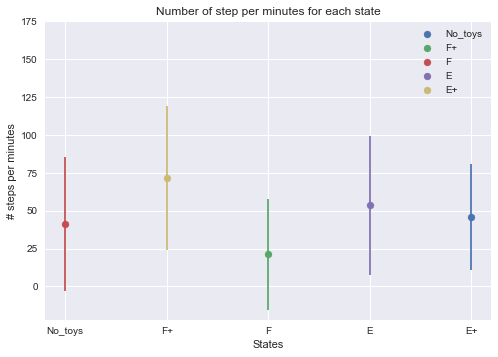

In [27]:
plt.style.use('seaborn')

fig, ax = plt.subplots()
i = 0
map_state_location = {4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"} # location: state
for x_loc, state in map_state_location.items():
# for state, step in step_mean_all_tasks.items():
    ax.scatter(x_loc, step_mean_all_tasks[state], label = state)
    ax.errorbar(x_loc, step_mean_all_tasks[state], yerr = step_std_all_tasks[state])
    i += 1
ax.legend()
ax.set_xticks(np.arange(5))
ax.set_xticklabels(list(map_state_location.values()))
ax.set_xlabel('States')
ax.set_ylabel('# steps per minutes')
ax.set_title('Number of step per minutes for each state')
plt.ylim(top = 175)

(-0.14442591241647434, 1.0)

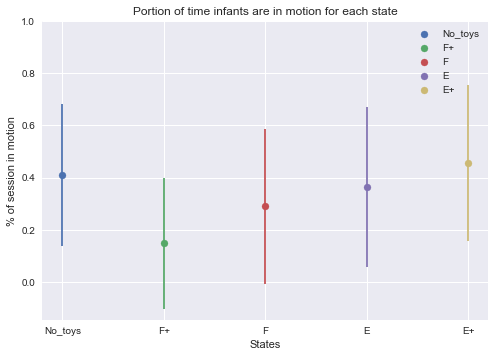

In [28]:
fig, ax = plt.subplots()
i = 0
map_state_location = {4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"}# location: state
for x_loc, state in map_state_location.items():
# for state, pct in movement_time_mean_all_tasks.items():
    ax.scatter(i, movement_time_mean_all_tasks[state], label = state)
    ax.errorbar(i, movement_time_mean_all_tasks[state], yerr = movement_time_std_all_tasks[state])
    i += 1
ax.legend()
ax.set_xticks(np.arange(5))
ax.set_xticklabels(list(map_state_location.values()))
ax.set_xlabel('States')
ax.set_ylabel("% of session in motion")
ax.set_title('Portion of time infants are in motion for each state')
plt.ylim(top = 1)

In [28]:
for state in range(n_states):
    print(state, np.mean(steps_by_each_task['MPM'][state]))

0 15.44636678200692
1 19.811728395061728
2 15.614678899082568
3 10.21078431372549
4 nan


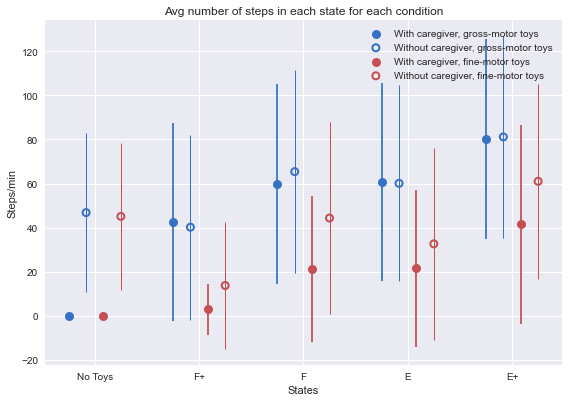

In [29]:
fig, ax = plt.subplots()
plt.style.use('seaborn')
map_state_location = {0: 4, 1: 2, 2: 0, 3:3, 4:1} # location: state
for x_loc in range(5):
    i = map_state_location[x_loc]
    if x_loc == 0:
        ax.scatter([x_loc*6], 0, edgecolors='b', facecolors = 'b', linewidths = 2) 
        # ax.errorbar(i*6, 0, yerr = np.std(steps_by_each_task['MPM'][i])*4, ecolor = 'b')

        ax.scatter([x_loc*6 + 1], np.mean(steps_by_each_task['NMM'][i])*4, facecolors = 'none', edgecolors = 'b', linewidths = 2) 
        ax.errorbar(x_loc*6 + 1, np.mean(steps_by_each_task['NMM'][i])*4, yerr = np.std(steps_by_each_task['NMM'][i])*4, ecolor = 'b', linestyle = 'dashed', elinewidth = 1)

        ax.scatter([x_loc*6 + 2], 0, facecolors = 'r', edgecolors = 'r', linewidths = 2) 
        # ax.errorbar(x_loc*6 + 2, 0, yerr = np.std(steps_by_each_task['MPS'][i])*4, ecolor = 'r')

        ax.scatter([x_loc*6 + 3], np.mean(steps_by_each_task['NMS'][i])*4, facecolors = 'none', edgecolors = 'r', linewidths = 2) 
        ax.errorbar(x_loc*6 + 3, np.mean(steps_by_each_task['NMS'][i])*4, yerr = np.std(steps_by_each_task['NMS'][i])*4, ecolor = 'r', linestyle = 'dashed', elinewidth = 1)

    elif x_loc == 1:
        ax.scatter([x_loc*6], np.mean(steps_by_each_task['MPM'][i])*4, label = "With caregiver, gross-motor toys", facecolors='b', edgecolors='b', linewidths = 2) 
        ax.errorbar(x_loc*6, np.mean(steps_by_each_task['MPM'][i])*4, yerr = np.std(steps_by_each_task['MPM'][i])*4, ecolor = 'b')

        ax.scatter([x_loc*6 + 1], np.mean(steps_by_each_task['NMM'][i])*4, label = "Without caregiver, gross-motor toys", facecolors = 'none', edgecolors = 'b', linewidths = 2) 
        ax.errorbar(x_loc*6 + 1, np.mean(steps_by_each_task['NMM'][i])*4, yerr = np.std(steps_by_each_task['NMM'][i])*4, ecolor = 'b', linestyle = 'dashed', elinewidth = 1)

        ax.scatter([x_loc*6 + 2], np.mean(steps_by_each_task['MPS'][i])*4, label = "With caregiver, fine-motor toys", facecolors = 'r', edgecolors = 'r', linewidths = 2) 
        ax.errorbar(x_loc*6 + 2, np.mean(steps_by_each_task['MPS'][i])*4, yerr = np.std(steps_by_each_task['MPS'][i])*4, ecolor = 'r')

        ax.scatter([x_loc*6 + 3], np.mean(steps_by_each_task['NMS'][i])*4, label = "Without caregiver, fine-motor toys", facecolors = 'none', edgecolors = 'r', linewidths = 2) 
        ax.errorbar(x_loc*6 + 3, np.mean(steps_by_each_task['NMS'][i])*4, yerr = np.std(steps_by_each_task['NMS'][i])*4, ecolor = 'r', linestyle = 'dashed', elinewidth = 1)



    else:
        ax.scatter([x_loc*6], np.mean(steps_by_each_task['MPM'][i])*4,  edgecolors = 'b', facecolors = 'b', linewidths = 2) 
        ax.errorbar(x_loc*6, np.mean(steps_by_each_task['MPM'][i])*4, yerr = np.std(steps_by_each_task['MPM'][i])*4, ecolor = 'b')

        ax.scatter([x_loc*6 +1], np.mean(steps_by_each_task['NMM'][i])*4, edgecolors = 'b', facecolors = 'none', linewidths = 2) 
        ax.errorbar(x_loc*6 + 1, np.mean(steps_by_each_task['NMM'][i])*4, yerr = np.std(steps_by_each_task['NMM'][i])*4, ecolor = 'b', linestyle = 'dashed', elinewidth = 1)

        ax.scatter([x_loc*6 +2], np.mean(steps_by_each_task['MPS'][i])*4,  edgecolors = 'r', facecolors = 'r', linewidths = 2) 
        ax.errorbar(x_loc*6 + 2, np.mean(steps_by_each_task['MPS'][i])*4, yerr = np.std(steps_by_each_task['MPS'][i])*4, ecolor = 'r')

        ax.scatter([x_loc*6 +3], np.mean(steps_by_each_task['NMS'][i])*4,  edgecolors = 'r', facecolors = 'none', linewidths = 2) 
        ax.errorbar(x_loc*6 + 3, np.mean(steps_by_each_task['NMS'][i])*4, yerr = np.std(steps_by_each_task['NMS'][i])*4, ecolor = 'r', linestyle = 'dashed', elinewidth = 1)
ax.legend(loc = 0)

ax.set_xticks([1.5, 7.5, 13.5, 19.5, 25.5])
ax.set_xticklabels(["No Toys", "F+", "F", "E", "E+"])
ax.set_xlabel("States")
ax.set_ylabel("Steps/min")
# ax.set_ylim(bottom =0)
plt.tight_layout()
plt.title("Avg number of steps in each state for each condition")
plt.show()

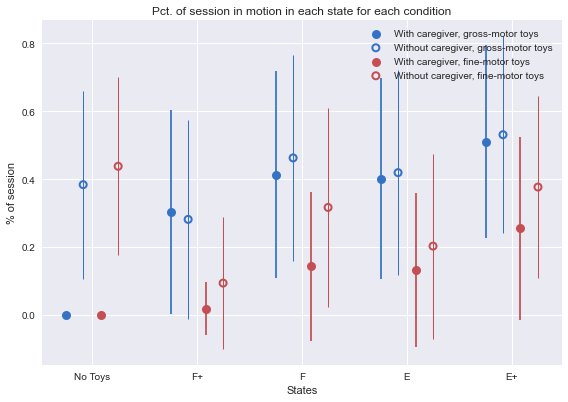

In [30]:
fig, ax = plt.subplots()
plt.style.use('seaborn')
map_state_location = {0: 4, 1: 2, 2: 0, 3:3, 4:1} # location: state
for x_loc in range(5):
    i = map_state_location[x_loc]
    if x_loc == 0:
        ax.scatter([x_loc*6], 0, facecolors='b', edgecolors='b', linewidths = 2) 
        # ax.errorbar(i*6, np.mean(steps_by_each_task['MPM'][i])*4, yerr = np.std(steps_by_each_task['MPM'][i])*4, ecolor = 'b')

        ax.scatter([x_loc*6 + 1], np.mean(movement_time_by_each_task['NMM'][i])/15000, facecolors = 'none', edgecolors = 'b', linewidths = 2) 
        ax.errorbar(x_loc*6 + 1, np.mean(movement_time_by_each_task['NMM'][i])/15000, yerr = np.std(movement_time_by_each_task['NMM'][i])/15000, ecolor = 'b', linestyle = 'dashed', elinewidth = 1)

        ax.scatter([x_loc*6 + 2], 0, facecolors = 'r', edgecolors = 'r', linewidths = 2) 
        # ax.errorbar(x_loc*6 + 2, np.mean(movement_time_by_each_task['MPS'][i])/15000, yerr = np.std(movement_time_by_each_task['MPS'][i])/15000, ecolor = 'r')

        ax.scatter([x_loc*6 + 3], np.mean(movement_time_by_each_task['NMS'][i])/15000, facecolors = 'none', edgecolors = 'r', linewidths = 2) 
        ax.errorbar(x_loc*6 + 3, np.mean(movement_time_by_each_task['NMS'][i])/15000, yerr = np.std(movement_time_by_each_task['NMS'][i])/15000, ecolor = 'r', linestyle = 'dashed', elinewidth = 1)

    elif x_loc == 1:
        ax.scatter([x_loc*6], np.mean(movement_time_by_each_task['MPM'][i])/15000, label = "With caregiver, gross-motor toys", facecolors='b', edgecolors='b', linewidths = 2) 
        ax.errorbar(x_loc*6, np.mean(movement_time_by_each_task['MPM'][i])/15000, yerr = np.std(movement_time_by_each_task['MPM'][i])/15000, ecolor = 'b')

        ax.scatter([x_loc*6 + 1], np.mean(movement_time_by_each_task['NMM'][i])/15000, label = "Without caregiver, gross-motor toys", facecolors = 'none', edgecolors = 'b', linewidths = 2) 
        ax.errorbar(x_loc*6 + 1, np.mean(movement_time_by_each_task['NMM'][i])/15000, yerr = np.std(movement_time_by_each_task['NMM'][i])/15000, ecolor = 'b', linestyle = 'dashed', elinewidth = 1)

        ax.scatter([x_loc*6 + 2], np.mean(movement_time_by_each_task['MPS'][i])/15000, label = "With caregiver, fine-motor toys", facecolors = 'r', edgecolors = 'r', linewidths = 2) 
        ax.errorbar(x_loc*6 + 2, np.mean(movement_time_by_each_task['MPS'][i])/15000, yerr = np.std(movement_time_by_each_task['MPS'][i])/15000, ecolor = 'r')

        ax.scatter([x_loc*6 + 3], np.mean(movement_time_by_each_task['NMS'][i])/15000, label = "Without caregiver, fine-motor toys", facecolors = 'none', edgecolors = 'r', linewidths = 2) 
        ax.errorbar(x_loc*6 + 3, np.mean(movement_time_by_each_task['NMS'][i])/15000, yerr = np.std(movement_time_by_each_task['NMS'][i])/15000, ecolor = 'r', linestyle = 'dashed', elinewidth = 1)



    else:
        ax.scatter([x_loc*6], np.mean(movement_time_by_each_task['MPM'][i])/15000,  edgecolors = 'b', facecolors = 'b', linewidths = 2) 
        ax.errorbar(x_loc*6, np.mean(movement_time_by_each_task['MPM'][i])/15000, yerr = np.std(movement_time_by_each_task['MPM'][i])/15000, ecolor = 'b')

        ax.scatter([x_loc*6 +1], np.mean(movement_time_by_each_task['NMM'][i])/15000, edgecolors = 'b', facecolors = 'none', linewidths = 2) 
        ax.errorbar(x_loc*6 + 1, np.mean(movement_time_by_each_task['NMM'][i])/15000, yerr = np.std(movement_time_by_each_task['NMM'][i])/15000, ecolor = 'b', linestyle = 'dashed', elinewidth = 1)

        ax.scatter([x_loc*6 +2], np.mean(movement_time_by_each_task['MPS'][i])/15000,  edgecolors = 'r', facecolors = 'r', linewidths = 2) 
        ax.errorbar(x_loc*6 + 2, np.mean(movement_time_by_each_task['MPS'][i])/15000, yerr = np.std(movement_time_by_each_task['MPS'][i])/15000, ecolor = 'r')

        ax.scatter([x_loc*6 +3], np.mean(movement_time_by_each_task['NMS'][i])/15000,  edgecolors = 'r', facecolors = 'none', linewidths = 2) 
        ax.errorbar(x_loc*6 + 3, np.mean(movement_time_by_each_task['NMS'][i])/15000, yerr = np.std(movement_time_by_each_task['NMS'][i])/15000, ecolor = 'r', linestyle = 'dashed', elinewidth = 1)
ax.legend(loc = 0)

ax.set_xticks([1.5, 7.5, 13.5, 19.5, 25.5])
ax.set_xticklabels(["No Toys", "F+", "F", "E", "E+"])
ax.set_xlabel("States")
ax.set_ylabel("% of session")
# ax.set_ylim(bottom =0)
plt.tight_layout()
plt.title("Pct. of session in motion in each state for each condition")
plt.show()

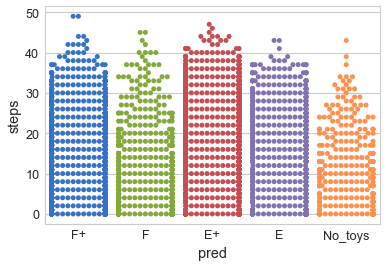

In [23]:
# movement_by_state = pd.DataFrame(data = movement_time_by_each_state)
ax = sns.swarmplot(x="pred", y="steps", data= all_df)


In [4]:
merged_pred_w_locomotion[task][1]

,onset,offset,pred,movement_time,steps
0,2298060.0,2313060.0,4,8472.0,23
1,2313060.0,2328060.0,4,9582.0,25
2,2328060.0,2343060.0,4,0.0,0
3,2343060.0,2358060.0,4,8806.0,27
4,2358060.0,2373060.0,4,11220.0,30
5,2373060.0,2388060.0,4,11086.0,29
6,2388060.0,2403060.0,3,8090.0,23
7,2403060.0,2418060.0,3,966.0,2
8,2418060.0,2433060.0,3,8520.0,22
9,2433060.0,2448060.0,0,9010.0,26
